# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [1]:
library(tidyverse)
library(gvlma)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 2.2.1     <U+221A> purrr   0.2.4
<U+221A> tibble  1.4.2     <U+221A> dplyr   0.7.4
<U+221A> tidyr   0.8.0     <U+221A> stringr 1.3.0
<U+221A> readr   1.1.1     <U+221A> forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Assignment 1


## Data

The data are given:


In [2]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

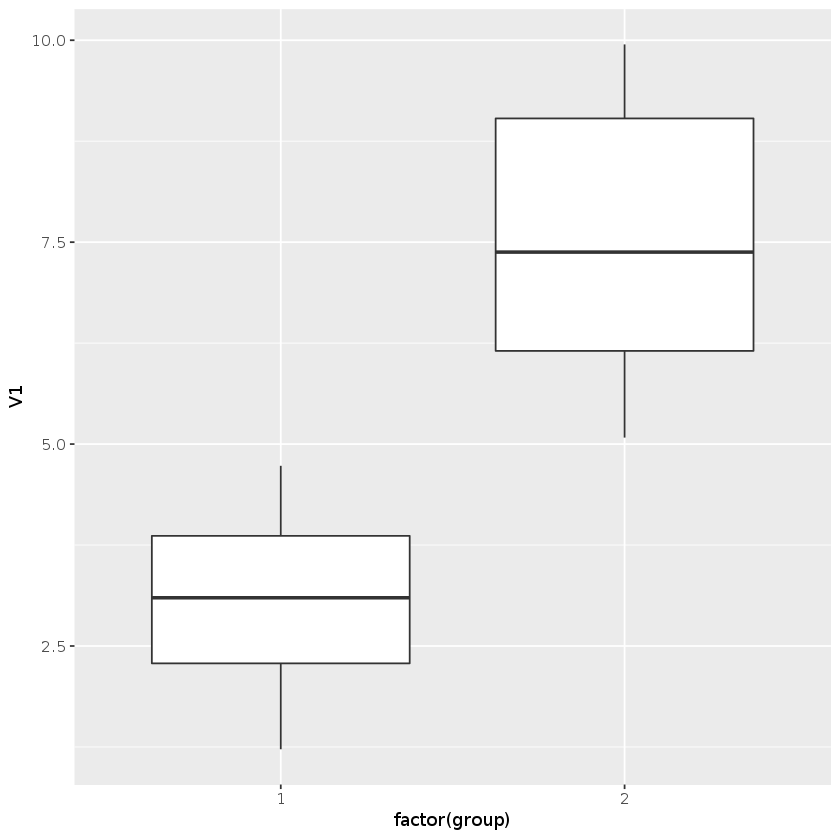

In [3]:
p <- ggplot(df1, aes(x=factor(group), y=V1)) + 
  geom_boxplot()

p

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.



Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


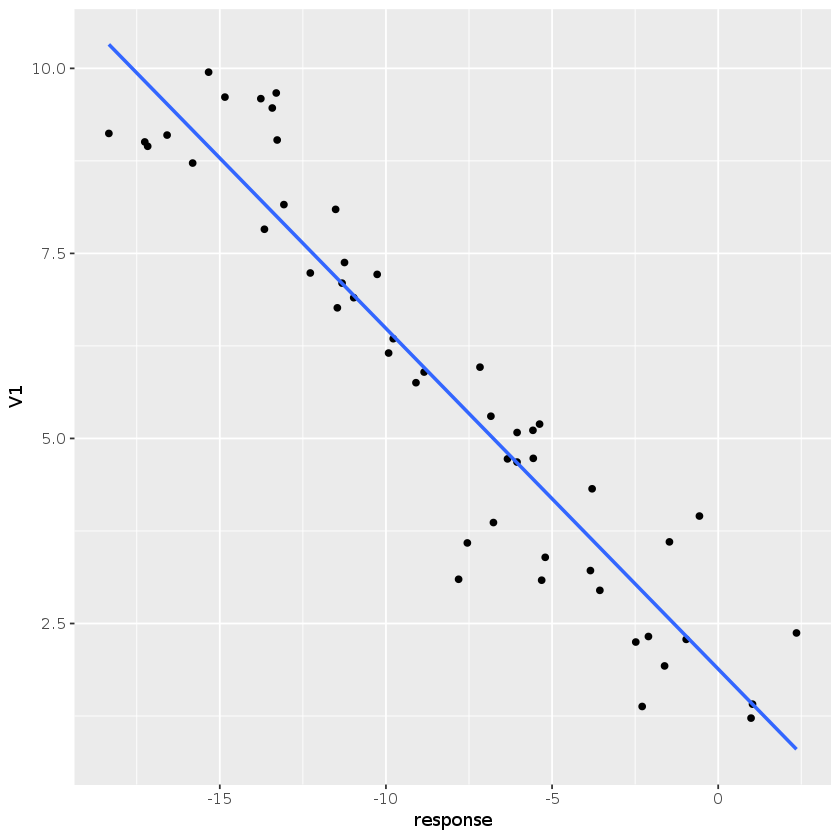

In [4]:
reg1 <- lm(data = df1, response ~ V1)

summary(reg1)

plot1 <- ggplot(df1, aes(x=response, y=V1)) + 
  geom_point()

plot2 <- plot1 + geom_smooth(method = "lm", se = FALSE)
plot2

check if the assumptions of linear regression are met with the `gvlma()` function.

In [5]:
gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



NULL

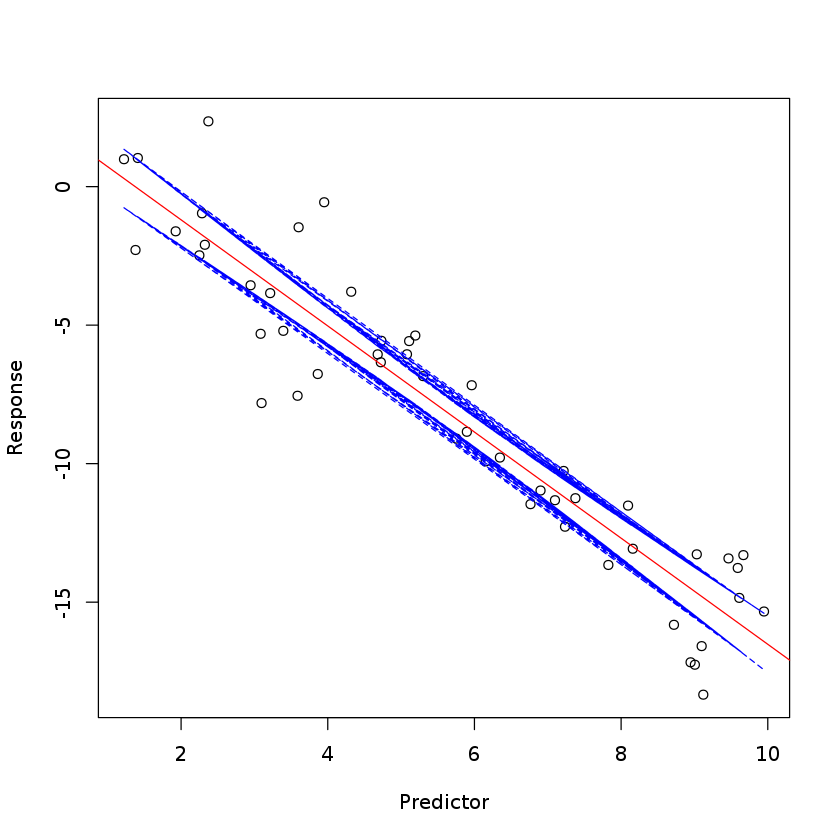

In [6]:
V1 = df1$V1
response = df1$response
plot3 <- plot(V1, response, xlab = "Predictor", ylab = "Response")
abline(lm(response ~ V1), col='red')

conf_interval <- predict(lm(response ~ V1), newdata=data.frame(x=V1), interval=c("confidence"),
                         level = 0.95)
lines(V1, conf_interval[,2], col="blue", lty=2)
lines(V1, conf_interval[,3], col="blue", lty=2)

plot3

# Assigment 2

# Packages

In [7]:
library(thematicmaps)
library(tidyverse)

Loading required package: maptools
Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: digest
Loading required package: rgdal
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.2, released 2016/10/24
 Path to GDAL shared files: /usr/share/gdal/2.1
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-4 
Loading required package: rgeos
rgeos version: 0.3-26, (SVN revision 560)
 GEOS runtime version: 3.5.1-CAPI-1.9.1 r4246 
 Linking to sp version: 1.2-4 
 Polygon checking: TRUE 

Loading required package: grid


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [8]:
map_municipal <- map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

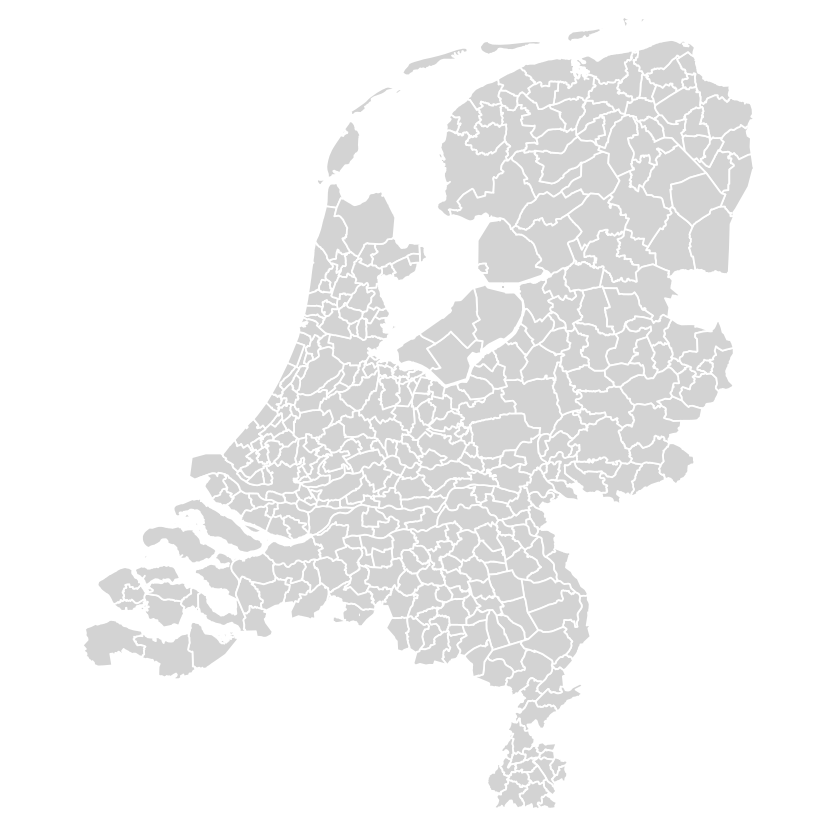

In [9]:
AddMapLayer(MapPlot(), map_municipal)

## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [10]:
pc4_locations <- read.csv2("../Sourcedata/nld_pc4_locations.csv", stringsAsFactors = FALSE, dec = ".")

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [11]:
schools <- read.csv2("../Sourcedata/schools.csv", stringsAsFactors = FALSE, dec = ".")

str(schools)

'data.frame':	1603 obs. of  31 variables:
 $ PROVINCIE                                 : chr  "                    " "Drenthe" "Drenthe" "Drenthe" ...
 $ BEVOEGD.GEZAG.NUMMER                      : int  41152 10053 10053 13273 13273 13273 13273 13273 13273 13273 ...
 $ BRIN.NUMMER                               : chr  "23HC" "18BR" "18BR" "20LO" ...
 $ VESTIGINGSNUMMER                          : chr  "23HC04" "18BR00" "18BR01" "20LO00" ...
 $ VESTIGINGSNAAM                            : chr  "RSG Lingecollege" "School voor Praktijkonderwijs Assen" "School voor Praktijkonderwijs Assen" "Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo" ...
 $ STRAATNAAM                                : chr  "                        " "Zwartwatersweg" "Bosrand" "Mr Groen v Prinstererln" ...
 $ HUISNUMMER.TOEVOEGING                     : chr  "            " "202" "2" "98" ...
 $ POSTCODE                                  : chr  "       " "9406 NN" "9401 SL" "9402 KG" ...
 $ PLAATSNAA

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [12]:
schools1 <- schools %>% 
        mutate(PC4 = substr(POSTCODE, 1, 4))

str(schools1$PC4)
str(schools1$DENOMINATIE)

 chr [1:1603] "    " "9406" "9401" "9402" "9331" "9411" ...
 chr [1:1603] "Openbaar" "Openbaar" "Openbaar" "Openbaar" ...


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [13]:
school_loc1 <- merge(pc4_locations, schools1, by = 'PC4')
school_loc <- filter(school_loc1, DENOMINATIE == "Rooms-Katholiek" | DENOMINATIE == "Protestants-Christelijk")
school_loc

PC4,X,Y,PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
1065,116701.2,485645.8,Noord-Holland,41217,01TC,01TC00,Scholengemeenschap voor Vwo Havo Mavo Het Hervormd Lyceum,Hemsterhuisstraat,79,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1071,120223.0,485571.3,Noord-Holland,40776,02AN,02AN00,Fons Vitae Lyceum Rooms Katholiek Scholengemeenschap voor Vwo en Havo,Reijnier Vinkeleskade,53,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1077,120152.7,484262.8,Noord-Holland,41217,02AR,02AR00,Scholengemeenschap voor Athenum en Havo Het Hervormd Lyceum Zuid,Brahmsstraat,7,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1077,120152.7,484262.8,Noord-Holland,40776,14SE,14SE00,Scholengemeenschap Sint Nicolaas Lyceum voor Lyceum en Havo,Beethovenplein,2,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1081,118277.6,482449.5,Noord-Holland,41217,14VY,14VY00,Chr Sgm Buitenveldert v Gymn Ath Havo en Mavo,De Cuserstraat,3,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1132,132947.2,501873.0,Noord-Holland,72853,20GS,20GS01,Don Bosco College Atheneum Havo Vmbo Lwoo,Val van Urk,1,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1132,132947.2,501873.0,Noord-Holland,72853,20GS,20GS00,Don Bosco College Atheneum Havo Vmbo Lwoo,Heideweg,2,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1185,118214.4,478212.6,Noord-Holland,41217,02TE,02TE00,H Wesselink College Christelijke Scholengemeenschap voor Vwo Havo Mavo,Startbaan,3,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1185,118214.4,478212.6,Noord-Holland,71553,02QZ,02QZ00,Keizer Karel College Vwo Havo,Elegast,5,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1211,140459.1,470645.8,Noord-Holland,40676,00PS,00PS10,Verenigde Scholen J.A. Alberdingk Thijm Voortgezet Onderwijs,Achterom,152,...,16,Gooi en Vechtstreek,20,Gooi en Vechtstreek,24,Het Gooi en Vechtstreek,15,Zuid-Noord-Holland,20,Gooi en Vechtstreek


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


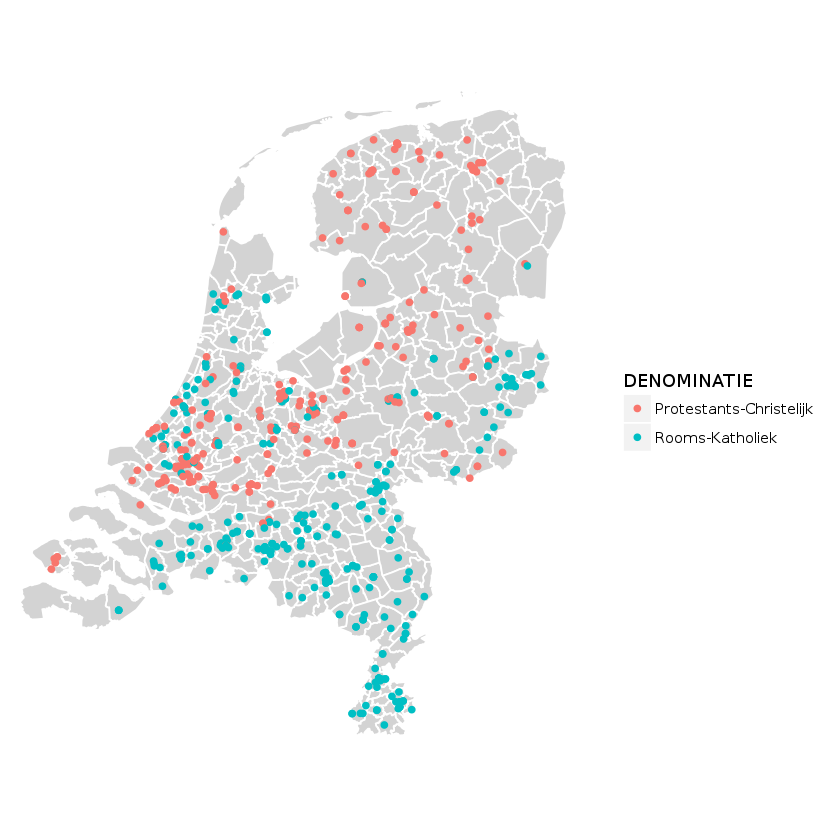

In [14]:
AddMapLayer(MapPlot(), map_municipal) %>%
       AddPointsLayer(school_loc, columnNameColor = "DENOMINATIE")
          

End of notebook